
# Seattle Airbnb Open Data

Seattle Airbnb open data from Kaggle will be used for this analysis.

## Applying CRISP-DM :
The goal of this analysis is to apply CRISP-DM process on Seattle Airbnb data, apply data science analysis and answer some questions related to the data.
CRISP-DM process has following steps:

   - Business Understanding
   - Data Understanding
   - Data Preparation
   - Modeling
   - Evaluation
   - Deployment

## Airbnb Business
A‌i‌r‌b‌n‌b‌,‌ ‌I‌n‌c‌.‌ operates a global online marketplace and hospitality service accessible via its websites and mobile apps.Airbnb aims to match two kinds of people together,those who have empty beds or houses that aren’t being used, and those who need a place to stay while on holiday.

Airbnb offers a place to stay if you’re looking to stay for several days or weeks in a row.Airbnb isn’t really designed for people who want a bed for a night—while it can accommodate those kinds of people, you may find a hotel will suit you better.

Airbnb recieves commission for each transactions that is carried out between the customers and the host.To increase revenue,Airbnb has to increase the number of bookings for the listings on their marketplace and it seems that the number of bookings depend mainly on 'price' and 'review ratings' of the listing.

For this project, i would like to explore Airbnb data and answer following questions:

- What is the price trend of the Airbnb listing and how it varies throughout the year?
- What months of the year the price is highest and lowest?
- Which neighborhoods recieved the best average ratings from the reviewers?
- What are the most important factors influencing the ratings of an Airbnb listing?
- What are the most important factors influencing the price of an Airbnb listing?
- what would be the prediction of the listing price based on important factors influencing the price?

## Airbnb Dataset

Airbnb dataset consists of three .csv files:
- **calendar**: contains 'price' and 'availability' of a listing on a given day.
- **listings**: contains full listing descriptions and their review scores.
- **reviews**: contains each reviewer's ID and their comments.

Let's import some needed python libraries to analaze data characteristics:

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import missingno as msno
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#from IPython.display import display
#pd.set_option('display.max_rows', None,'display.max_columns',None)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

Let's read the Airbnb Boston and Seattle dataset files into their respective pandas dataframes:

In [2]:
# Read the Boston and Seattle CSV files and create a pandas dataframe
list_boston=pd.read_csv('../airbnb/listings_boston.csv')
calendar_boston=pd.read_csv('../airbnb/calendar_boston.csv')
review_boston=pd.read_csv('../airbnb/reviews_boston.csv')
list_seattle=pd.read_csv('../airbnb/listings_seattle.csv')
calendar_seattle=pd.read_csv('../airbnb/calendar_seattle.csv')
review_seattle=pd.read_csv('../airbnb/reviews_seattle.csv')

In [3]:
# Define a function to get dataframe 'name' as a helper function for other functions
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name
# Define a function to summarize the data 
def data_summary(df):
    print('{} Air BnB {} data shape is {} with {} numerical,and {} text columns.'
          .format(get_df_name(df).split('_')[1].title(),get_df_name(df).split('_')[0].title(),df.shape,
          len(df.select_dtypes(include='number').columns),len(df.select_dtypes(include='object').columns)))

In [4]:
data_summary(list_boston)
data_summary(calendar_boston)
data_summary(review_boston)

Boston Air BnB List data shape is (3585, 95) with 33 numerical,and 62 text columns.
Boston Air BnB Calendar data shape is (1308890, 4) with 1 numerical,and 3 text columns.
Boston Air BnB Review data shape is (68275, 6) with 3 numerical,and 3 text columns.


Lets examine sample rows of data for list, calendar and review datset:

In [5]:
# Print head of the list,calendar and review data
list_boston.head(2)
list_boston.columns.values
calendar_boston.head(2)
calendar_boston.columns.values
review_boston.head(2)
review_boston.columns.values

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bath

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN


array(['listing_id', 'date', 'available', 'price'], dtype=object)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...


array(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name',
       'comments'], dtype=object)

Lets examine the columns for missing values if any in listing, calendar and review datasets

In [6]:
# Define a function to print missing vlaue % for each columns,list of columns with "NO" and "All" missing values.
def missing_values(df):
    print('% of Missing Values:')
    print( df.isnull().mean()*100)
    #Provide a set of columns with 0 missing values.
    no_nulls =set(df.columns[df.notna().sum()==df.shape[0]])
    print ('{} dataframe has following columns with no missing values...{}'.format(get_df_name(df).split('_')[0].title(),no_nulls))
    #Provide a set of columns with all missing values.
    all_nulls =set(df.columns[df.isnull().sum()==df.shape[0]])
    print ('{} dataframe has following columns with 100% missing values...{}'.format(get_df_name(df).split('_')[0].title(),all_nulls))

In [7]:
missing_values(list_boston)
missing_values(calendar_boston)
missing_values(review_boston)

% of Missing Values:
id                                    0.000000
listing_url                           0.000000
scrape_id                             0.000000
last_scraped                          0.000000
name                                  0.000000
summary                               3.988842
space                                29.483961
description                           0.000000
experiences_offered                   0.000000
neighborhood_overview                39.470014
notes                                55.090656
transit                              35.983264
access                               41.534170
interaction                          43.347280
house_rules                          33.249651
thumbnail_url                        16.708508
medium_url                           16.708508
picture_url                           0.000000
xl_picture_url                       16.708508
host_id                               0.000000
host_url                              0

## Airbnb Data Prepartion
Based on some basic analysis above, it seems datasets needs cleanup and preprocessing before we can answer the questions related to Airbnb business.
There are columns in the listings dataset which have all the values missing which can be removed.

Following columns from 'listings' data can be removed since they no values.
- 'jurisdiction_names' 
- 'license'
- 'has_availability' 
- 'neighbourhood_group_cleansed'

In [8]:
# List of columns to drop from listings dataset since they have all values missing
list_boston_columns_todrop=['jurisdiction_names', 'license', 'has_availability', 'neighbourhood_group_cleansed']
list_boston=list_boston.drop(list_boston_columns_todrop,axis=1)

Let's list the data types of all of the columns of listings dataset:

In [9]:
# List all data types of the 'listings' dataset
list_boston.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [10]:
# List data types of 'calendar' and 'review' dataset
calendar_boston.dtypes
review_boston.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

From the above list of data types,following columns would be well represented by the 'float' data types instead of 'object' and in order to do that data values needs to be cleaned to remove '$',and ',' characters:
- price
- weekly_price
- monthly_price
- security_deposit
- cleaning_fee 
- extra_people

Following columns also need to be cleaned to remove special characters like '%' to convert them to 'float':
- 'host_response_rate'
- host_acceptance_rate'

Also, calendar and review datasets have 'date' column with 'object' data type which is better to be coverted to 'datetime'

In [11]:
#Lets print the above colums head as they exists in dataset before processing and converting them
cols_price=['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people',
            'host_response_rate','host_acceptance_rate']
for col in cols_price:
    #print('{} datatype is:{}'.format(col,list_boston[col].dtype))
    list_boston[col].head(3)

print('"review_boston.date" datatype is:{}'.format(review_boston.date.dtype))
review_boston.date.head(3)
print('"calendar_boston.date" datatype is:{}'.format(calendar_boston.date.dtype))
calendar_boston.date.head(3)

0    $250.00
1     $65.00
2     $65.00
Name: price, dtype: object

0        NaN
1    $400.00
2    $395.00
Name: weekly_price, dtype: object

0          NaN
1          NaN
2    $1,350.00
Name: monthly_price, dtype: object

0       NaN
1    $95.00
2       NaN
Name: security_deposit, dtype: object

0    $35.00
1    $10.00
2       NaN
Name: cleaning_fee, dtype: object

0     $0.00
1     $0.00
2    $20.00
Name: extra_people, dtype: object

0     NaN
1    100%
2    100%
Name: host_response_rate, dtype: object

0     NaN
1    100%
2     88%
Name: host_acceptance_rate, dtype: object

"review_boston.date" datatype is:object


0    2013-05-21
1    2013-05-29
2    2013-06-06
Name: date, dtype: object

"calendar_boston.date" datatype is:object


0    2017-09-05
1    2017-09-04
2    2017-09-03
Name: date, dtype: object

In [12]:
# Lets define a function to perform some basic cleanup and conversion of the data types identified above
def process_convert_df(list_df,calendar_df,review_df):
    """
    INPUTS:
        list_df -listings dataframe
        calendar_df - calendar dataframe
        review_df - review dataframe
    OUTPUTS:
        Return cleaned and processed INPUT dataframes
    """
    cols_list_price=['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']
    cols_list_response=['host_response_rate','host_acceptance_rate']
  
    #Check if columns already in required clean and data type state
    #Clean and process price columns to float data type
    for colp in cols_list_price:
        if list_df[colp].dtype=='float64':
            print('{} is already cleaned and proccessed'.format(colp))
        else:    
            list_df[colp]=list_df[colp].str.replace('$','').str.replace(',','').astype(float)
    for colr in cols_list_response:
        if list_df[colr].dtype=='float64':
            print('{} is already cleaned and proccessed'.format(colr))
        else:
            list_df[colr]= list_df[colr].str.replace('%','').astype(float)     
    if calendar_df.price.dtype=='float64':
        print('price is already cleaned and proccessed')
    else:    
        calendar_df.price = calendar_df.price.str.replace('$','').str.replace(',','').astype(float)
    
    # Convert date columns from object type to datetime
    if review_df.date.dtype=='datetime64[ns]':
        print('review.date is already cleaned and proccessed')
    else:
        review_df['date'] = pd.to_datetime(review_df['date'], format='%Y-%m-%d')
    if calendar_df.date.dtype=='datetime64[ns]':
        print('calendar.date is already cleaned and proccessed')
    else:
        calendar_df['date'] = pd.to_datetime(calendar_df['date'], format='%Y-%m-%d')

In [13]:
process_convert_df(list_boston,calendar_boston,review_boston)
process_convert_df(list_seattle,calendar_seattle,review_seattle)

In [14]:
#Lets print the above colums head as they exists in dataset after processing and converting them
cols_price_after=['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people',
            'host_response_rate','host_acceptance_rate']
for col in cols_price_after:
    print('{} datatype is:{}'.format(col,list_boston[col].dtype))
    list_boston[col].head(3)

print('"review_boston.date" datatype is:{}'.format(review_boston.date.dtype))
review_boston.date.head(3)
print('"calendar_boston.date" datatype is:{}'.format(calendar_boston.date.dtype))
calendar_boston.date.head(3)

price datatype is:float64


0    250.0
1     65.0
2     65.0
Name: price, dtype: float64

weekly_price datatype is:float64


0      NaN
1    400.0
2    395.0
Name: weekly_price, dtype: float64

monthly_price datatype is:float64


0       NaN
1       NaN
2    1350.0
Name: monthly_price, dtype: float64

security_deposit datatype is:float64


0     NaN
1    95.0
2     NaN
Name: security_deposit, dtype: float64

cleaning_fee datatype is:float64


0    35.0
1    10.0
2     NaN
Name: cleaning_fee, dtype: float64

extra_people datatype is:float64


0     0.0
1     0.0
2    20.0
Name: extra_people, dtype: float64

host_response_rate datatype is:float64


0      NaN
1    100.0
2    100.0
Name: host_response_rate, dtype: float64

host_acceptance_rate datatype is:float64


0      NaN
1    100.0
2     88.0
Name: host_acceptance_rate, dtype: float64

"review_boston.date" datatype is:datetime64[ns]


0   2013-05-21
1   2013-05-29
2   2013-06-06
Name: date, dtype: datetime64[ns]

"calendar_boston.date" datatype is:datetime64[ns]


0   2017-09-05
1   2017-09-04
2   2017-09-03
Name: date, dtype: datetime64[ns]

Lets look at the data distribution of the listings by plotting histograms:

In [15]:
# function to plot the distribution of the numerical columns
def plot_hist(df):
    df.hist(bins=20, xlabelsize=20, ylabelsize=20, figsize=(40,40));

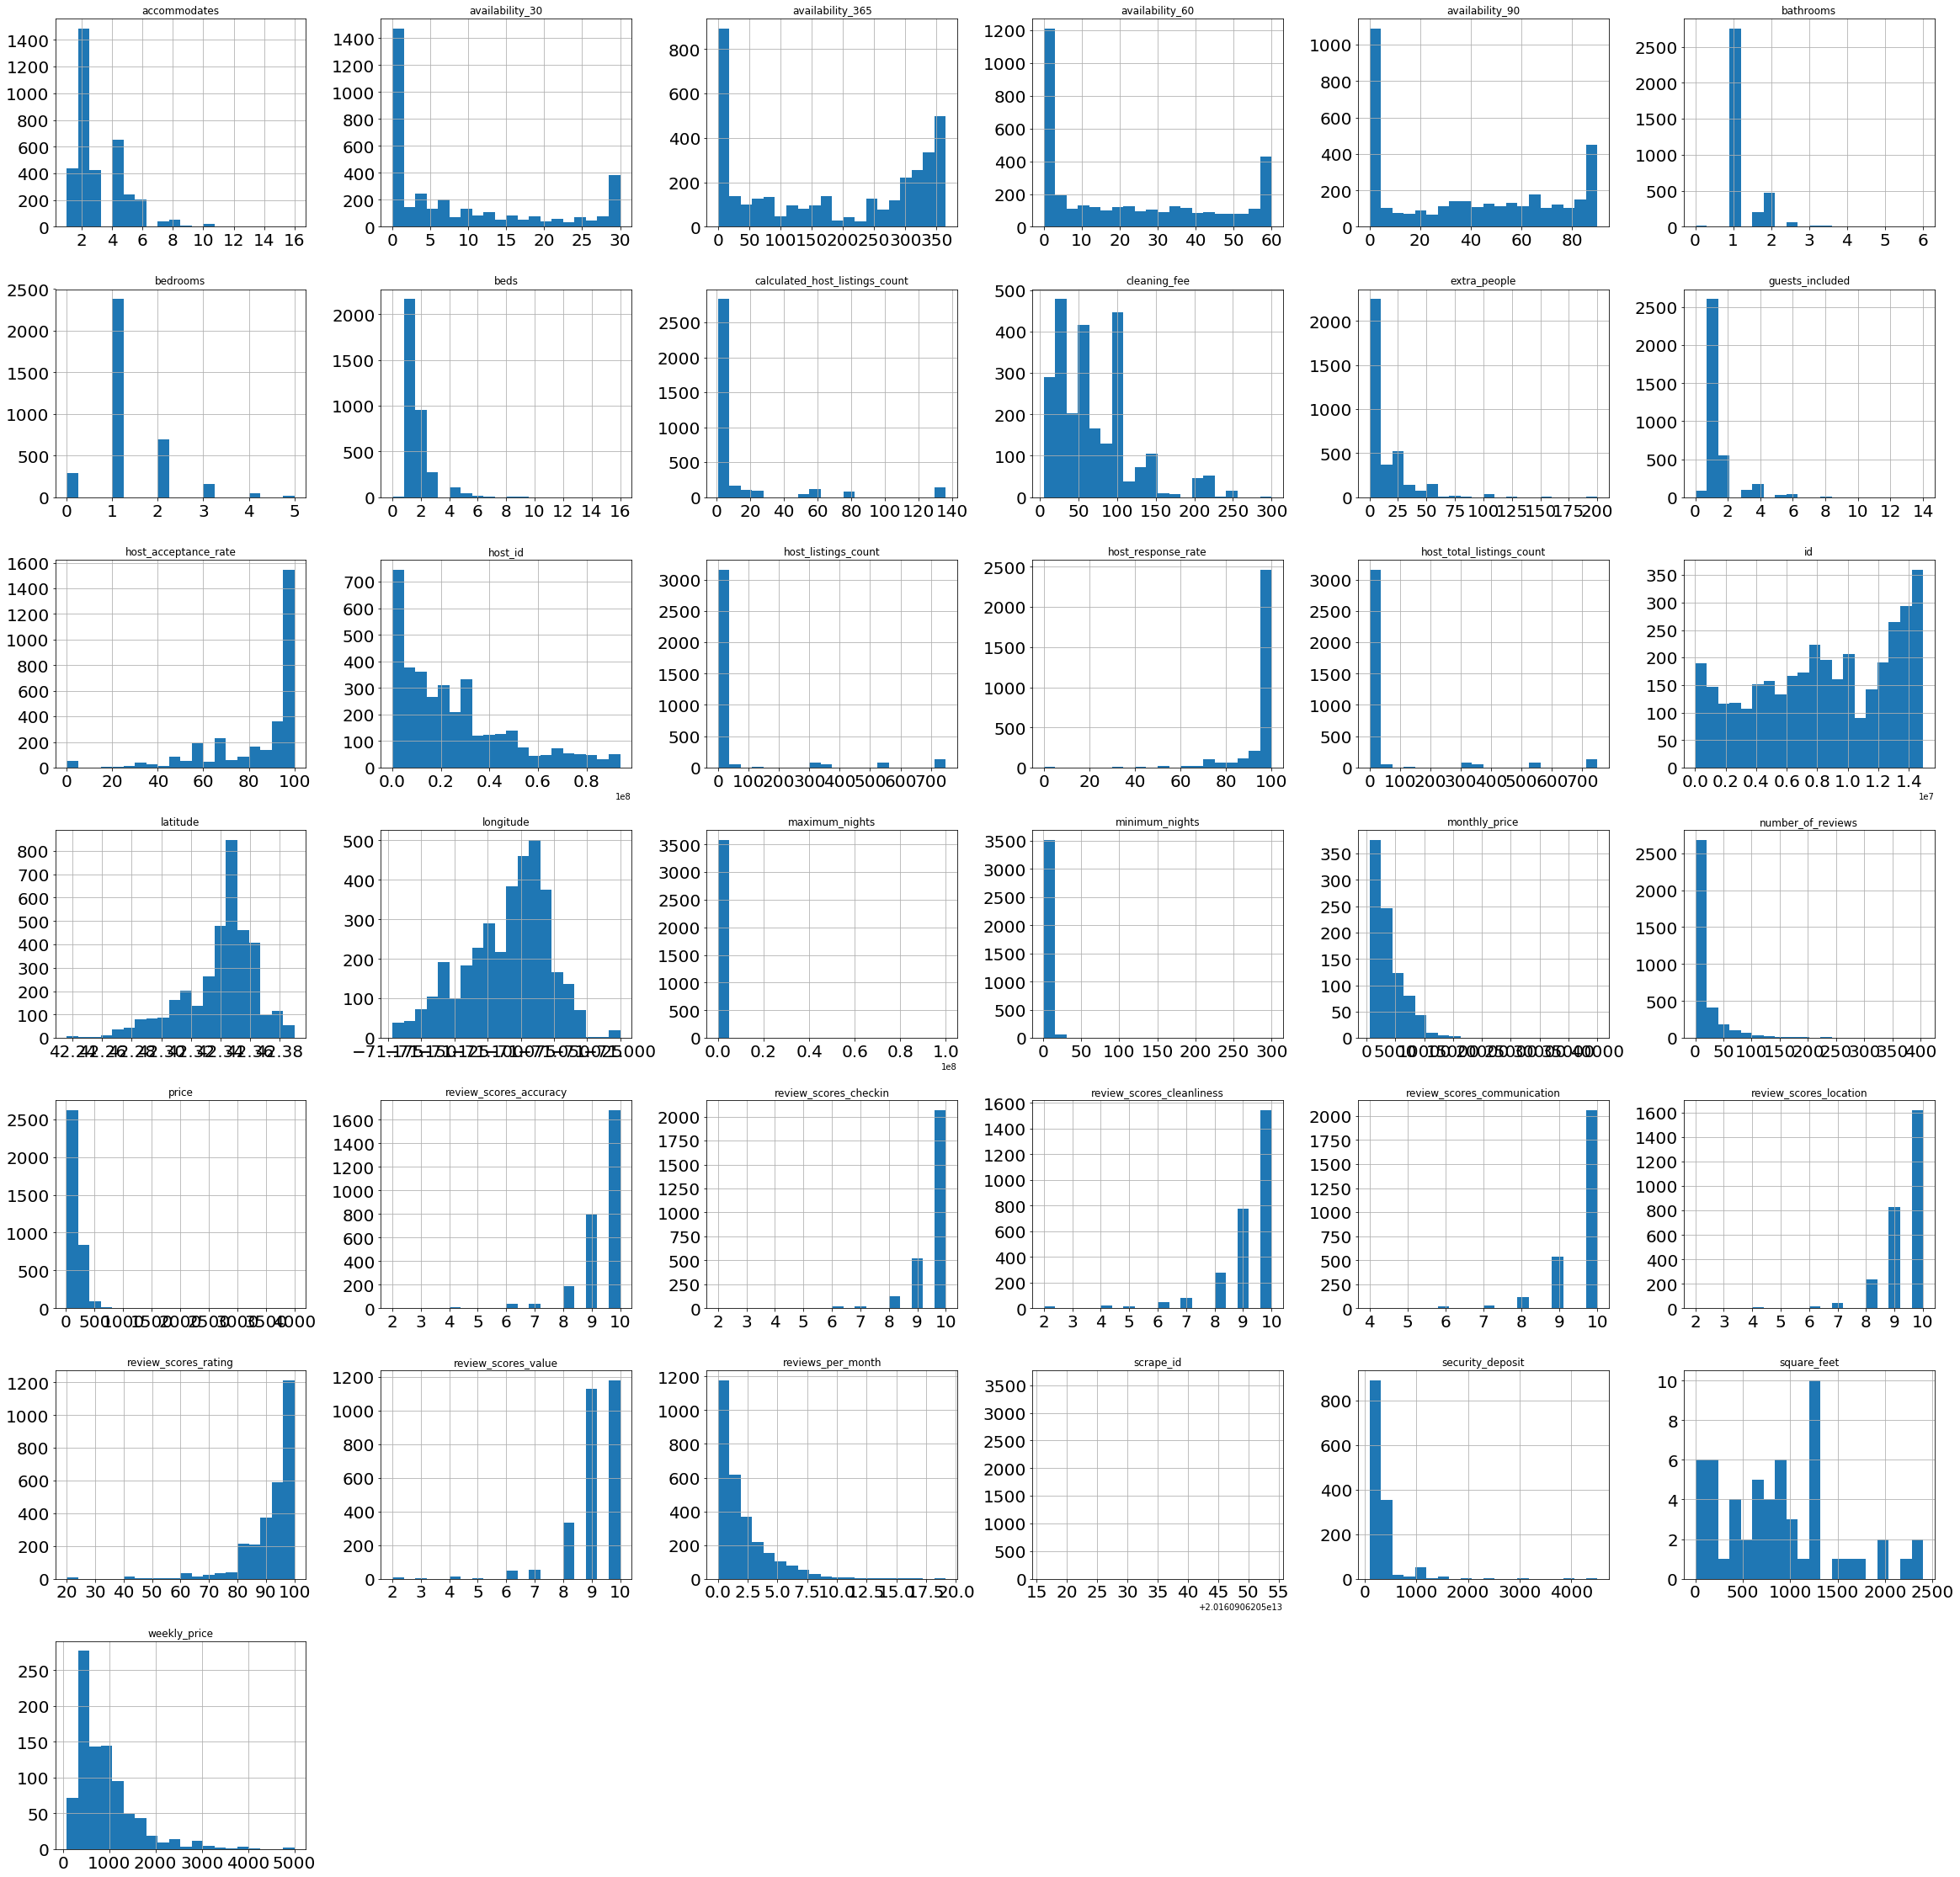

In [16]:
plot_hist(list_boston)

## Question 1:What factors in the AirBnB dataset influence listing prices?

Let's look at the columns of the 'listings' dataset by plots of certain columns to understand data better.

In [17]:
# Create function to plot the dataframe and columns
def plot_data(df,column):
    df_plot=df.groupby(column).agg({'id':'count'})
    df_plot.plot(kind='bar',title='Counts by {}'.format(column))
    plt.xlabel(column);
    plt.ylabel('Count');
    plt.show(); 

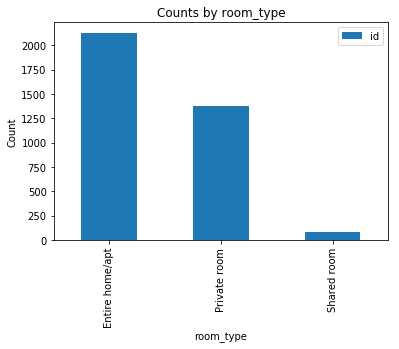

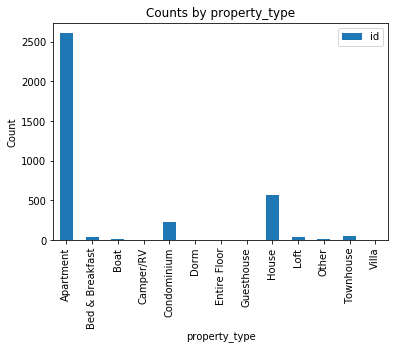

In [18]:
# Lets plot the data for Boston dataset
plot_data(list_boston,'room_type')
plot_data(list_boston,'property_type')

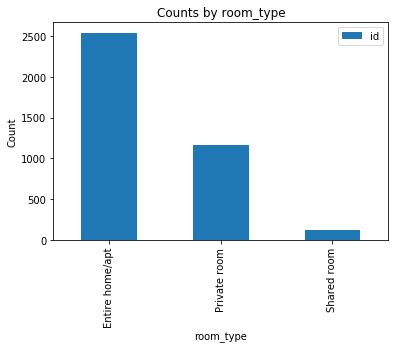

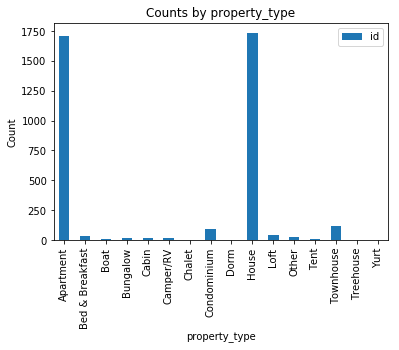

In [19]:
# Lets plot the for Seattle dataset
plot_data(list_seattle,'room_type')
plot_data(list_seattle,'property_type')

Based on above charts:
- Most of the property listings are comprised of 'entire property' than that of 'private rooms' or 'shared rooms' according to 'room_type' data.
- 'Property_type' also plays an important factor for the lsitings.Propoerty type of 'Apartment' and 'houses' take up major chunk of all the listings with few listings are of different kinds for both Boston and Seattle Airbnb datasets.

In [20]:
# Lets analyze listing prices for different 'roomt_type' and 'property_type' togather
def list_price(df):
    df = df.groupby(['property_type','room_type']).price.mean().reset_index().sort_values('price',ascending=[0])
    return df

In [21]:
# Lets plot heatmap of listing prices for different 'roomt_type' and 'property_type' togather
def list_price_plot(df):
    plt.figure(figsize=(12,12))
    sns.heatmap(df.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f");

In [22]:
list_boston_price=list_price(list_seattle)
list_seattle_price=list_price(list_seattle)

In [23]:
list_boston_price.head()
list_seattle_price.head()

,property_type,room_type,price
6,Boat,Entire home/apt,447.250000
36,Treehouse,Entire home/apt,200.000000
33,Townhouse,Entire home/apt,197.166667
21,House,Entire home/apt,191.128635
17,Condominium,Entire home/apt,167.902778


,property_type,room_type,price
6,Boat,Entire home/apt,447.250000
36,Treehouse,Entire home/apt,200.000000
33,Townhouse,Entire home/apt,197.166667
21,House,Entire home/apt,191.128635
17,Condominium,Entire home/apt,167.902778


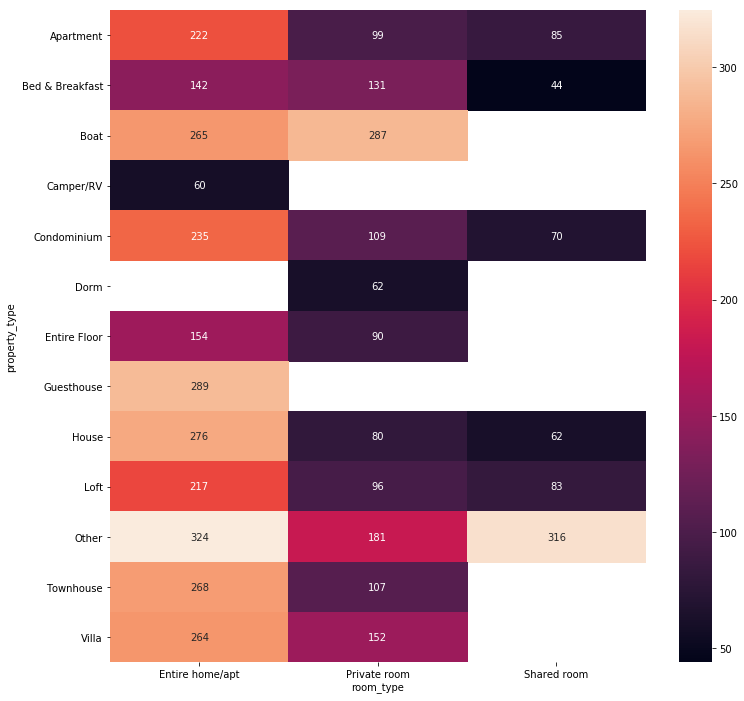

In [24]:
list_price_plot(list_boston)

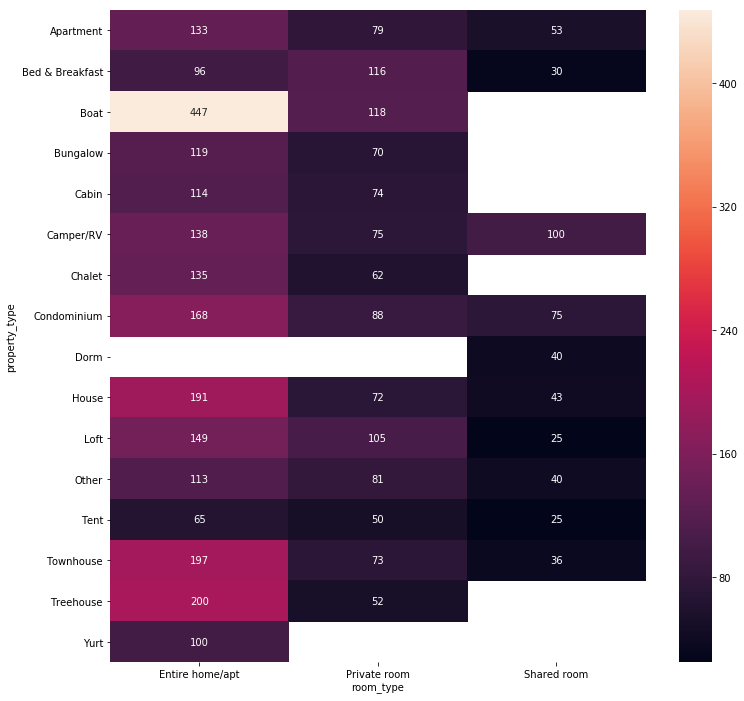

In [25]:
list_price_plot(list_seattle)

Above heatmap charts show Airbnb listing prices broken down by 'property_type' and 'room_type'.

Following can be concluded from above charts:
- For almost all 'property_type', prices for 'Entire home/apartment' is the maximum.
- 'property_type' and 'room_type' plays a very important role in deciding price of a listing

In [26]:
# Lets analyze listing prices for number of 'bedroom' and 'neighbour hood' type
def list_price_bedroom(df):
    df = df.groupby(['neighbourhood_cleansed', 'bedrooms']).price.mean().reset_index().sort_values('price',ascending=[0])
    return df.head()

In [27]:
list_price_bedroom(list_boston)
list_price_bedroom(list_seattle)

,neighbourhood_cleansed,bedrooms,price
107,South End,5.0,1300.00
19,Beacon Hill,5.0,849.00
18,Beacon Hill,4.0,660.00
106,South End,4.0,600.00
105,South End,3.0,526.75


,neighbourhood_cleansed,bedrooms,price
340,West Queen Anne,5.0,837.5
350,Westlake,4.0,775.0
257,Portage Bay,6.0,750.0
45,Broadway,6.0,673.0
76,Eastlake,3.0,600.0


In [28]:
# Lets plot heatmap of listing prices for for number of 'bedroom' and 'neighbour hood' type
def list_price_bedroom_plot(df):
    plt.figure(figsize=(12,12))
    sns.heatmap(df.groupby(['neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f");

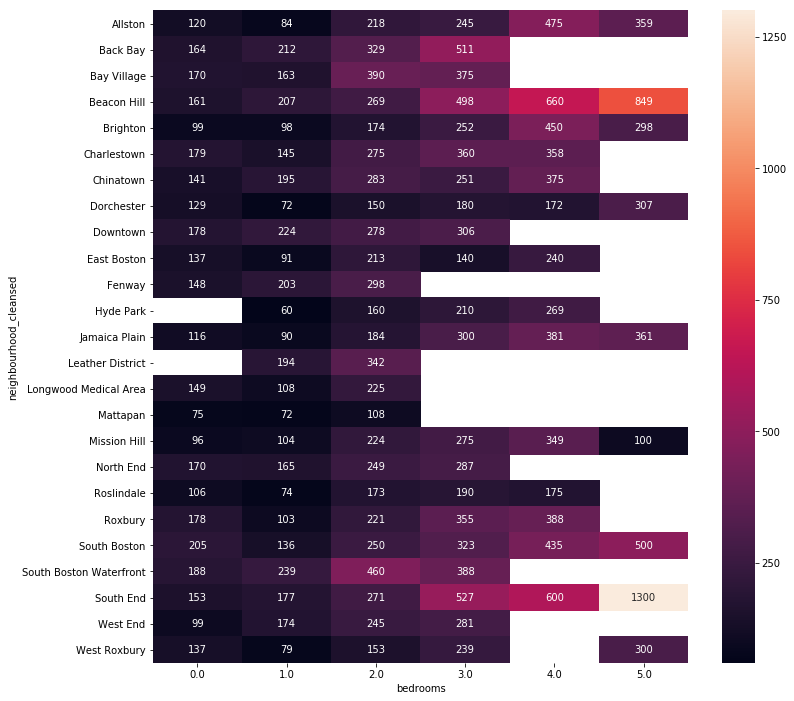

In [29]:
list_price_bedroom_plot(list_boston)

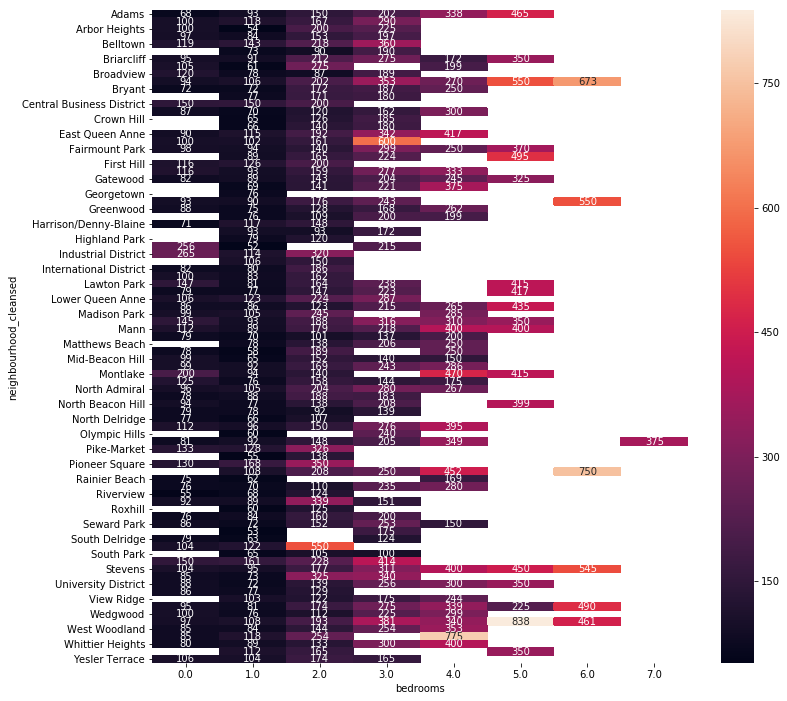

In [30]:
list_price_bedroom_plot(list_seattle)

Above heatmap charts show Airbnb listing prices broken down by 'neighbourhood' and 'bedroom'.

Following can be concluded from above charts:

-  With the increase of bedroom numbers, prices of listings increase and also has some dependency on neighborhood.

In summary, the above analysis gives us data points that the prices of listings on Airbnb depends upon the room type, property type, number of bedrooms and neighbourhood type.

It can be seen that the property_type of Apartment and the room_type of 'Entire House' with more number of bedrooms has higher prices.

## Question 2:How does the price of a Airbnb listing vary throughout the year?

Let's look at the 'calendar' datasets of Boston and Seattle Airbnb datasets.

In [31]:
calendar_boston.head()
review_boston.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [32]:
# create a function to parse the dates into month,year and week day.
def parse_dates(df,date_col):
    df['year']=df.date.dt.year
    df['month']=df.date.dt.month
    df['week day']=df.date.dt.weekday_name

In [33]:
# Lets parse the dates using parse_dates function
parse_dates(calendar_boston,'date')
parse_dates(calendar_seattle,'date')
parse_dates(review_boston,'date')
parse_dates(review_seattle,'date')

In [34]:
calendar_boston.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [35]:
# Define a function to plot trend of price throught the year
def price_trend_date(df):
    """
    INPUTS:
        df - calendar dataframe
    OUTPUTS:
        Display a line chart of the price variation over an year timeframe
    """
    # Aggregate the price based on the date
    cal_df=df.groupby('date')['price'].mean().reset_index()
    # Plot a line chart to see how the price vary over a period of time
    plt.figure(figsize=(15,8))
    plt.plot(cal_df['date'],cal_df['price'])
    plt.title('Average price of {} listing by Date'.format(get_df_name(df).split('_')[1].title()))
    plt.xlabel('Date')
    plt.ylabel('Average price')
    plt.show()

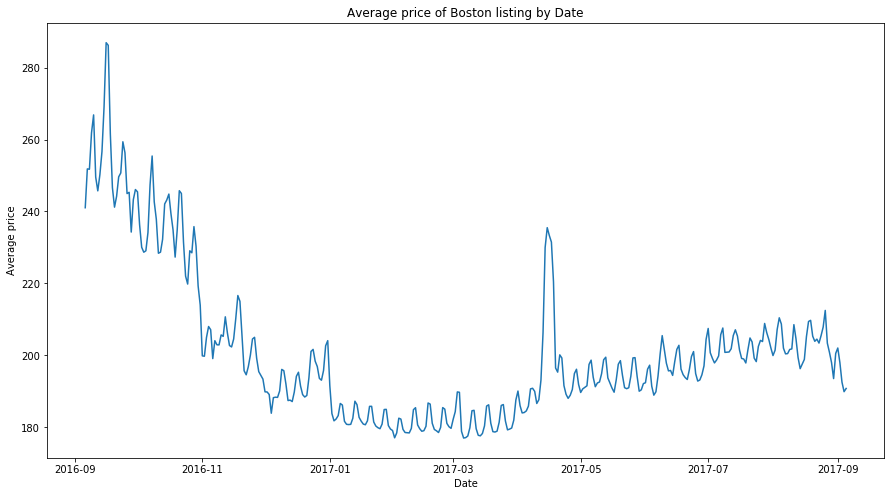

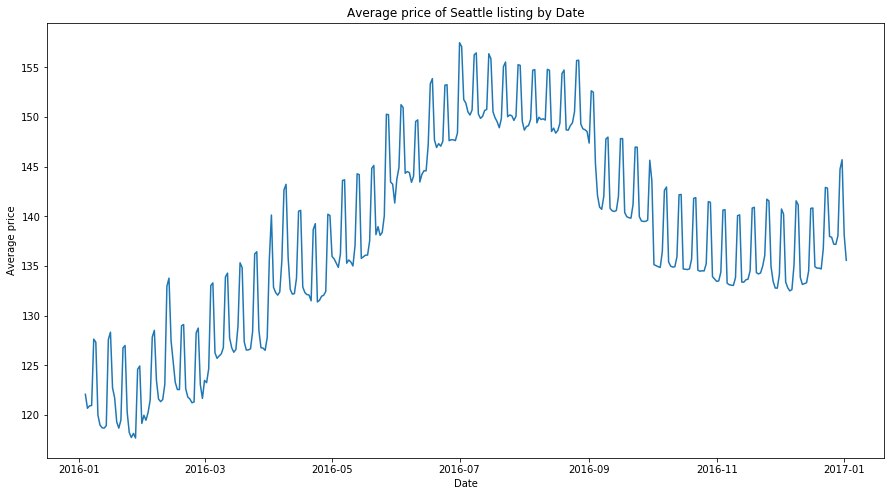

In [36]:
price_trend_date(calendar_boston)
price_trend_date(calendar_seattle)

From the above charts:
- Listing prices for 'Boston' listings peaked in Sept and Oct months and then again jumped for short duartion in April and May months.
- Listing prices for 'Seattle' listings peaked between July and Sept months only.
- Boston listing average prices seems to trend higher than Seattle listing average prices. 

In [37]:
# Define a function to plot trend of prices over week days
def price_trend_day(df):
    plt.figure(figsize=(15, 8))
    ax=sns.boxplot(x = 'week day',  y = 'price', data = df, palette="Blues", width=0.6,showfliers=False)
    ax.set_title('{} price trend over week days'.format(get_df_name(df).split('_')[1].title()))
    plt.show();

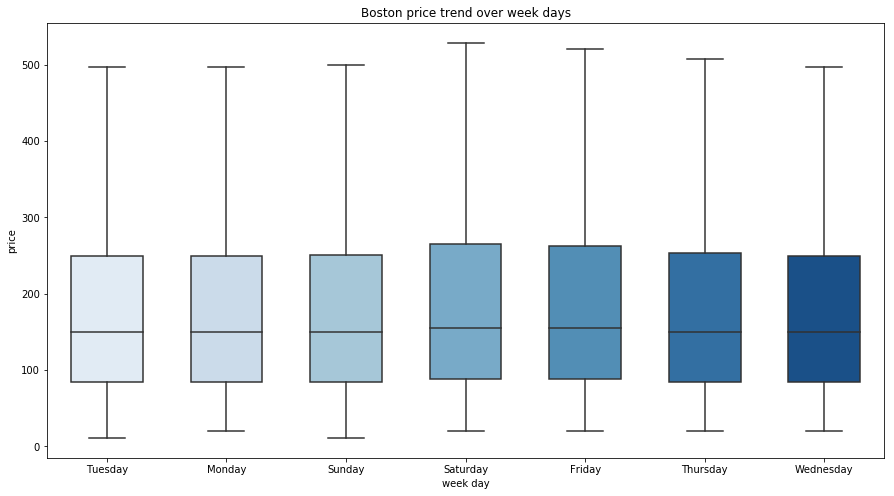

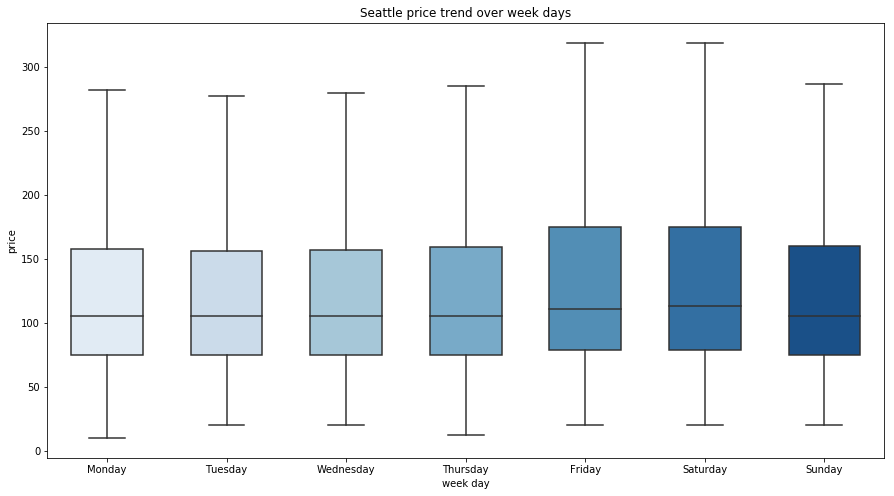

In [38]:
price_trend_day(calendar_boston)
price_trend_day(calendar_seattle)

From the above boxplots:
- Boston listing prices trend higher over Thursday,Friday and Saturday.
- Seattle listing prices trend higher over Friday and Saturday.
- In conclusion, both listing prices trend higher over Friday and Saturday's but not on Sunday.

Overall, it seems from the analysis of data that the prices of a Airbnb listings is higher in summer months of July till October and over the Friday and Saturday's of every week.

## Question 3: What Airbnb locations are best to invest to get maximum revenue?

We will analyze the Airbnb listings data to find if there is a trend to find the best locations for investment as host of the Airbnb lsitings.

As per the analysis in Question 1,the maximum number of listings are for the room_type of 'Entire Home/Apartment' and they seem to fetch higher prices than other categories.

In [39]:
# Lets calculate mean prices for each room_type of listings of Airbnb datasets
def df_avg_price(df):
    """
    Input-Dataframe
    Output-Dataframe with mean price of per 'room_type' listings
    """
    df=df.groupby('room_type').price.mean().reset_index()
    return df

In [40]:
df_avg_price(list_boston)
df_avg_price(list_seattle)

,room_type,price
0,Entire home/apt,227.436765
1,Private room,96.041364
2,Shared room,92.762500


,room_type,price
0,Entire home/apt,155.843369
1,Private room,75.044828
2,Shared room,47.547009


From above data, it can be seen that room_type of 'Entire home/Apartment' has the maximum mean price and then 'private room' and 'Shared room' in that order.

It seems investing in the 'Enitre home/apt' kind would be able to fetch more revenue compared to other types.

In [41]:
#Lets create two dataframes by count of listings and average price in compare to 'neighbourhood'
def nhood_count_price(df):
    """
    Input-Dataframe
    Output-A dataframe with avg price and listing counts per neighbourhood and plotting them in a bar chart
    """
    df_count=df.groupby('neighbourhood_cleansed').id.count().reset_index()
    df_count=df_count.rename(columns={'id':'Listing_count'}).sort_values('Listing_count',ascending=[0])
    df_price=df.groupby('neighbourhood_cleansed').price.mean().reset_index()
    df_price=df_price.rename(columns={'price':'avg_price'}).sort_values('avg_price',ascending=[0])
    #Merging above two dataframes
    df_price_count=pd.merge(df_price,df_count,on='neighbourhood_cleansed').sort_values('avg_price',ascending=[0])
    return df_price_count

In [42]:
#Lets plot the count and average price
def plot_nhood_count_price(df):
    """
    Input-Dataframe
    Output-A combined chart with avg price and listing counts per neighbourhood
    """
    nhood_count_price(df).sort_values('Listing_count',ascending=[0]).plot(kind='bar', 
           x='neighbourhood_cleansed',
           y=['Listing_count','avg_price'],
           color = ['green','blue'], 
           figsize =(15,8), 
           title = 'Neighborhood Frequency', 
           legend = True);

In [43]:
nhood_count_price(list_boston).head()
nhood_count_price(list_seattle).head()

,neighbourhood_cleansed,avg_price,Listing_count
0,South Boston Waterfront,306.060241,83
1,Bay Village,266.833333,24
2,Leather District,253.600000,5
3,Back Bay,240.950331,302
4,Downtown,236.459302,172


,neighbourhood_cleansed,avg_price,Listing_count
0,Southeast Magnolia,231.705882,17
1,Portage Bay,227.857143,14
2,Westlake,194.470588,17
3,West Queen Anne,187.769231,65
4,Montlake,182.789474,19


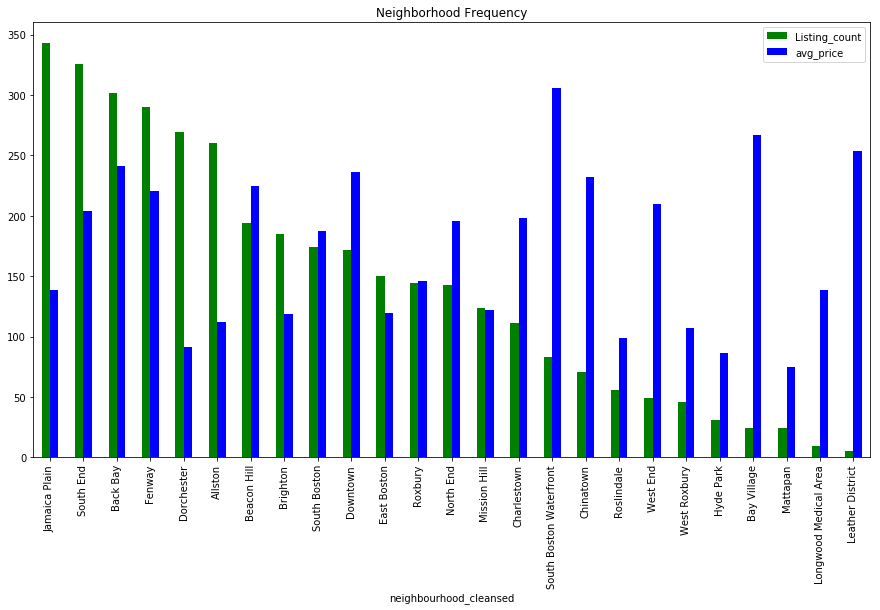

In [44]:
plot_nhood_count_price(list_boston)

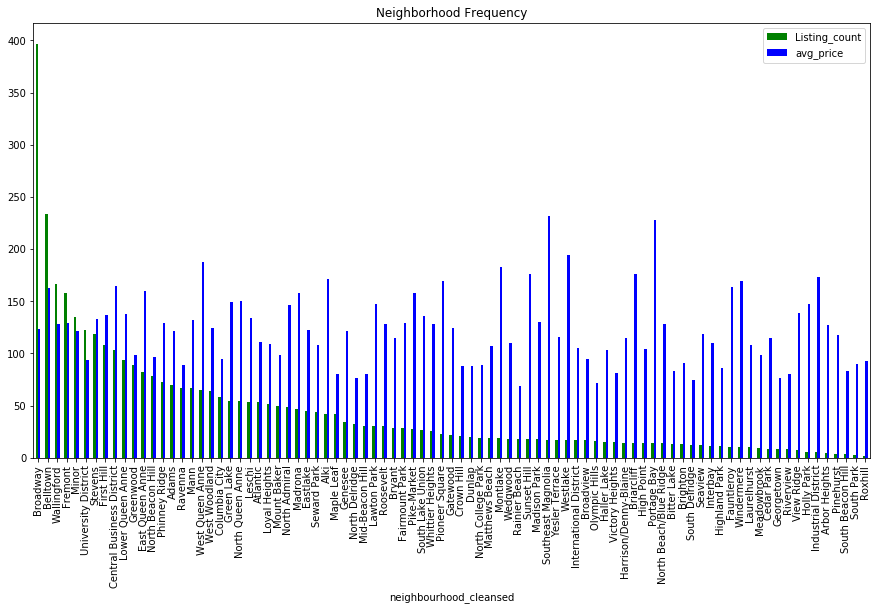

In [45]:
plot_nhood_count_price(list_seattle)

By analysis of data and above charts:

-  Most of the listing are in Jamaica Plain, South end and Back Way in Boston Airbnb data.
-  Most of the listing are in Boradway, Beltown in Seattle Airbnb data.
-  It seems neighorhoods with a most listings, average prices are more accurate.However, neighborhoods with less than   100 listings may have relatively inaccurate average prices due to presence of outliers. Looking at the analysis done so far, one might conclude that certain neighborhoods are more 'expensive' than others.
- 'Back Bay','Beacon Hill' and 'South Boston' seems to be locations in Boston where listing counts correlated well with price  and could be potential locations for investments.
- 'Greenwood','North Beacon Hill','Stevens' and 'First Hill' seems to be locations in Seattle where listing counts correlated well with price  and could be potential locations for investments.

In summary, it can be concluded that:

- Investment in a property which have maximum number of listings and high average prices may result in maximum returns.
- Listing an entire property on Airbnb will  generate maximum revenue.

## Question 4: What are the most important features to predict price of a listing?

We will analyze and process the Airbnb dataset to prepare it for identifying most important features and predict the price of using machine learning model.Price would be our target variable.

In [46]:
# Define a function to generate heatmap of correlation matrix of the listing dataset columns
def correlation_matrix(df):
    plt.figure(figsize=(20, 15))
    corr=df.corr()
    sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True,fmt=".2f",cmap='coolwarm')

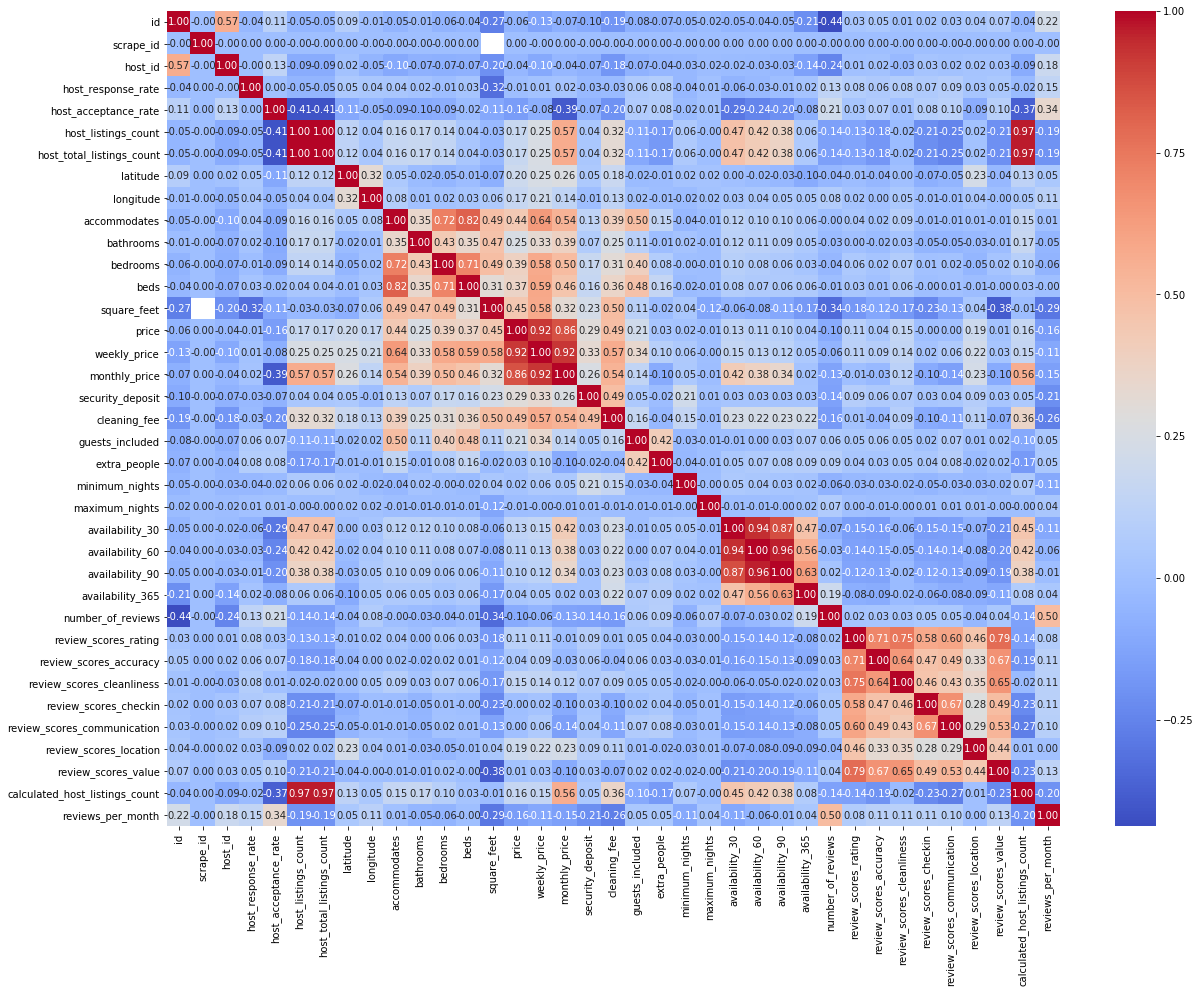

In [47]:
correlation_matrix(list_boston)

In [48]:
corr_price=round(list_boston.corr(),2)

In [49]:
corr_price.price.sort_values(ascending=False)

price                             1.00
weekly_price                      0.92
monthly_price                     0.86
cleaning_fee                      0.49
square_feet                       0.45
accommodates                      0.44
bedrooms                          0.39
beds                              0.37
security_deposit                  0.29
bathrooms                         0.25
guests_included                   0.21
latitude                          0.20
review_scores_location            0.19
longitude                         0.17
host_total_listings_count         0.17
host_listings_count               0.17
calculated_host_listings_count    0.16
review_scores_cleanliness         0.15
availability_30                   0.13
review_scores_rating              0.11
availability_60                   0.11
availability_90                   0.10
availability_365                  0.04
review_scores_accuracy            0.04
extra_people                      0.03
minimum_nights           

From above correlation matrix of 'price' with other numeric variables, it is cear that the 'price' is highly correlated with:
- how many people a listing can 'accomodates'
- Number of 'bedrooms','beds','bathrooms',and number of 'guests_included
- the number of amenities that are offered to the customers

We need to include categorical columns also into our correlation and to do that we would need to clean the data first and convert them to numerical columns.

Lets define some functions to clean and convert categorical or object columns to numerical.

In [50]:
#Define a function to clean and pre-process the listings text data attributes
def clean_df(df):
    """
    Input:  A dataframe that has to be cleaned and mising values needs to be treated accordingly
    Output: A clean dataframe
    
    """
    df=df.copy()
    df=df.loc[:,['host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost',
                 'neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms',
                 'bedrooms','beds','bed_type','amenities','price','weekly_price','monthly_price',
                 'security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights',
                 'maximum_nights','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                 'review_scores_checkin','review_scores_communication','review_scores_location',
                 'review_scores_value','instant_bookable','cancellation_policy']]
    #Replace 'f' with 0 and 't' with 1 below columns
    df['host_is_superhost']=df['host_is_superhost'].str.replace('f','0')
    df['host_is_superhost']=df['host_is_superhost'].str.replace('t','1')
    df['instant_bookable']=df['instant_bookable'].str.replace('f','0')
    df['instant_bookable']=df['instant_bookable'].str.replace('t','1')
    
    #Converting these two coumns as well to float and converting it from percentage to number
    df['host_is_superhost']=df['host_is_superhost'].astype('float64')
    df['instant_bookable']=df['instant_bookable'].astype('float64')
    
    #Filling the missing values with 0
    df['host_is_superhost'].fillna(0,inplace=True)
    df['instant_bookable'].fillna(0,inplace=True)
    df['weekly_price'].fillna(0,inplace=True)
    df['monthly_price'].fillna(0,inplace=True)
    df['security_deposit'].fillna(0,inplace=True)
    df['cleaning_fee'].fillna(0,inplace=True)
    df['extra_people'].fillna(0,inplace=True)
    df['review_scores_accuracy'].fillna(0,inplace=True)
    df['review_scores_cleanliness'].fillna(0,inplace=True)
    df['review_scores_checkin'].fillna(0,inplace=True)
    df['review_scores_communication'].fillna(0,inplace=True)
    df['review_scores_location'].fillna(0,inplace=True)
    df['review_scores_value'].fillna(0,inplace=True)
    df['review_scores_rating'].fillna(0,inplace=True)
    df['host_response_rate'].fillna(0,inplace=True)
    df['host_acceptance_rate'].fillna(0,inplace=True)
    
    #Let us clean  the ameneties column
    df['amenities']=df['amenities'].str.replace("{","")
    df['amenities']=df['amenities'].str.replace("}","")
    df['amenities']=df['amenities'].str.replace(" ","")
    df['amenities']=df['amenities'].str.replace('"','')
    df['amenities']=df['amenities'].str.replace(",","  ")
    df['amenities']
    df['amenities_length']=df['amenities'].str.len()
    df=df.drop(['amenities'],axis=1)
    #Converting these categories to integer values
    df['host_response_time'].replace('within an hour',1, inplace=True)
    df['host_response_time'].replace('within a few hours',2,inplace=True)
    df['host_response_time'].replace('within a day',3,inplace=True)
    df['host_response_time'].replace('a few days or more',4,inplace=True)
    #Filling the missing values of this column as well
    df['host_response_time'].fillna(method='ffill',inplace=True)
    #Let us also treat missing values of some other columns
    df['beds'].fillna(method='ffill',inplace=True)
    df['bathrooms'].fillna(method='ffill',inplace=True)
    df['bedrooms'].fillna(method='ffill',inplace=True)
    return df

In [51]:
list_boston_t1=clean_df(list_boston)
list_seattle_t1=clean_df(list_seattle)

In [52]:
list_boston_t1.shape
list_seattle_t1.shape

(3585, 31)

(3818, 31)

In [53]:
# Lets examine the categorical values of 'property_type' and 'bed_type'
list_boston_t1.property_type.value_counts()
list_boston_t1.bed_type.value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

Real Bed         3453
Futon              51
Airbed             40
Pull-out Sofa      31
Couch              10
Name: bed_type, dtype: int64

In [54]:
list_seattle_t1.property_type.value_counts()
list_seattle_t1.bed_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

It seems 'property_type' and 'bed_type' has values which could be coded as 'Other' to make them more meaninnful and concise.

In [55]:
#Define a function to recode the bed_type column values.
def code_bed(value):
    """
    Input:'bed_type' column
    Output: A concise list of values
    """
    if value not in ['Real Bed']:
        return 'Other'
    return value

In [56]:
#Define a function to recode property_type values
def code_property(value):
    """
    Input:'property_type' column
    Output: A concise list of values
    """
    if value not in ['House','Apartment','Cabin','Condominium','Bungalow','Townhouse']:
        return 'Other'
    return value

In [57]:
#Apply 'code_property' and 'code_bed' functions to Airbnb listings datasets
def apply_recode(df):
    df['bed_type']=df['bed_type'].apply(code_bed)
    df['property_type']=df['property_type'].apply(code_property)

In [58]:
apply_recode(list_boston_t1)
apply_recode(list_seattle_t1)

In [59]:
# Lets examine the values after recoding the categorical values of 'property_type' and 'bed_type'
list_seattle_t1.bed_type.value_counts()
list_seattle_t1.property_type.value_counts()
list_boston_t1.bed_type.value_counts()
list_boston_t1.property_type.value_counts()

Real Bed    3657
Other        161
Name: bed_type, dtype: int64

House          1733
Apartment      1708
Other           134
Townhouse       118
Condominium      91
Cabin            21
Bungalow         13
Name: property_type, dtype: int64

Real Bed    3453
Other        132
Name: bed_type, dtype: int64

Apartment      2612
House           562
Condominium     231
Other           126
Townhouse        54
Name: property_type, dtype: int64

Now the values for 'bed_type' and 'property_type' are more concise and more meanigful

In [60]:
#Lets drop the following columns which are very highly correlated to target variable 'price'
def drop_otherprice_columns(df):
    df=df.drop(['cleaning_fee','weekly_price',
                'monthly_price','security_deposit'],axis=1,inplace=True)

In [61]:
drop_otherprice_columns(list_boston_t1)

In [62]:
drop_otherprice_columns(list_seattle_t1)

In [63]:
for col in list_seattle_t1.columns:
    print (col)

host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
neighbourhood_cleansed
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
price
guests_included
extra_people
minimum_nights
maximum_nights
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
instant_bookable
cancellation_policy
amenities_length


In [64]:
#Lets encode the following categorical features into dummy variables
cols_to_encode=['cancellation_policy','room_type','property_type','bed_type','neighbourhood_cleansed']
list_boston_t1=pd.get_dummies(list_boston_t1,columns=cols_to_encode)
list_seattle_t1=pd.get_dummies(list_seattle_t1,columns=cols_to_encode)

In [65]:
list_boston_t1.shape
list_seattle_t1.shape

(3585, 61)

(3818, 124)

In [66]:
list_boston_t1.host_response_time.fillna(0,inplace=True)

In [103]:
# Define a function to create train and test data and train the data with Linear Regression Model 
# and print top 20 important features correlated with listing price
def lreg_model(df):
    X,y=df.drop('price',axis=1),df.price
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=34)
    model=LinearRegression()
    model.fit(X_train,y_train)
    coef=pd.DataFrame({'features':X.columns,'importance':model.coef_})
    y_predict = model.predict(X_test)
    mean_S_error=np.sqrt(metrics.mean_squared_error(y_test, y_predict))
    print('Top 20 features are listed in the bar chart below.')
    coef.sort_values('importance',ascending=False)[:20].plot(x='features', y='importance',kind='bar')
    print('Mean Sqaured Error of the linear regression model is: {}'.format(mean_S_error))

Top 20 features are listed in the bar chart below.
Mean Sqaured Error of the linear regression model is: 65.25791516317744


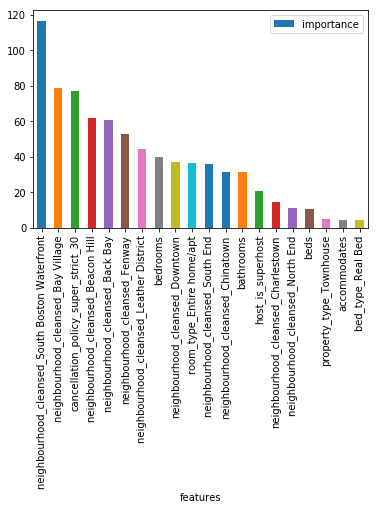

In [104]:
lreg_model(list_boston_t1);

Top 20 features are listed in the bar chart below.
Mean Sqaured Error of the linear regression model is: 51.56547059446806


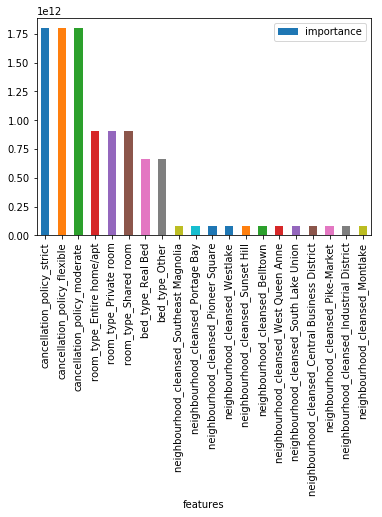

In [105]:
lreg_model(list_seattle_t1);

In [92]:
# Define a function to create train and test data and train the data with Decision Tree Model 
# and print top 10 important features correlated with listing price
def decision_tree(df):
    X,y=df.drop('price',axis=1),df.price
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=34)
    model_dtree = tree.DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,)
    model_dtree = model_dtree.fit(X_train,y_train)
    feature_impt = model_dtree.feature_importances_
    feature_names = X_train.columns
    tree_result = pd.DataFrame({'feature': feature_names, 'importance': feature_impt})
    print('Top 20 features are listed in the bar chart below.')
    tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')
    y_predict =  model_dtree.predict(X_test)
    MSE = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
    print('Mean Sqaured Error of the linear regression model is: {}'.format(MSE))

Top 10 features are listed in the bar chart below.
Mean Sqaured Error of the linear regression model is: 464.47369324374137
464.47369324374137


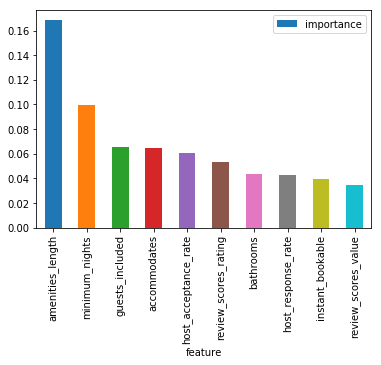

In [93]:
decision_tree(list_boston_t1)

Top 10 features are listed in the bar chart below.
Mean Sqaured Error of the linear regression model is: 108.66235711323007
108.66235711323007


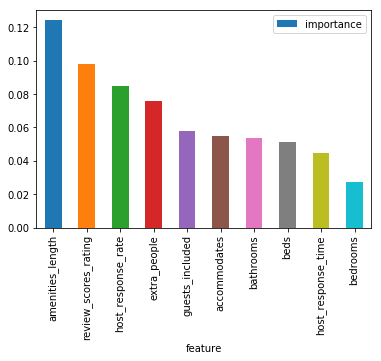

In [106]:
decision_tree(list_seattle_t1)

In [101]:
# Define a function to create train and test data and train the data with Linear Regression Model 
# and print top 20 important features correlated with listing price
def random_forest(df):
    X,y=df.drop('price',axis=1),df.price
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=34)
    random_f = RandomForestRegressor(max_depth=3, random_state=0)
    random_f.fit(X_train, y_train)
    feature_names = X_train.columns
    feature_importance = random_f.feature_importances_
    result = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
    print('Top 20 features are listed in the bar chart below.')
    result.sort_values(by='importance',ascending=False)[:20].plot(x='feature', y='importance', kind='bar')
    #Let us test our random forest regressor to see how it performs on our test dataset
    y_pred = random_f.predict(X_test)
    MSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Mean Sqaured Error of the linear regression model is: {}'.format(MSE))

C:\Users\nikki\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Top 20 features are listed in the bar chart below.
Mean Sqaured Error of the linear regression model is: 73.44169711320288


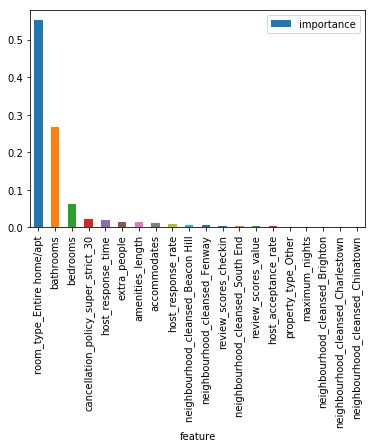

In [102]:
random_forest(list_boston_t1)

C:\Users\nikki\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Top 20 features are listed in the bar chart below.
Mean Sqaured Error of the linear regression model is: 53.431242123488786


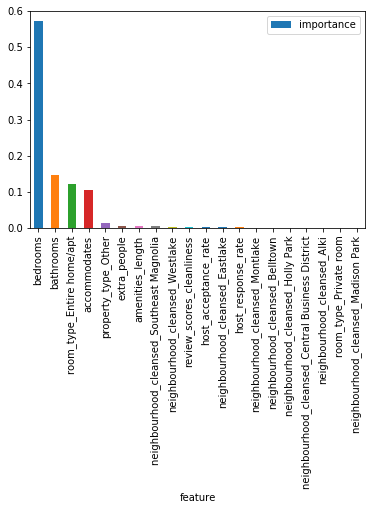

In [107]:
random_forest(list_seattle_t1)

As the mean squared error of the linear regression is the lowest of all the models used above, linear regression would be the best model to determine the important fetaures in predicting the listing price.It seems following features are very important in predicting price of a listing using linear regression model:
  - neighborhood type
  - number of bedrooms and bathroomm in the house
  - Property type
  - host is a superhost or not
  - How many people it accomodates?

## Conclusion

In conclusion, i gathered following facts about the Airbnb data:

- It can be concluded that the property_type of Apartment and the room_type of 'Entire House' with more number of bedrooms has higher prices.
- It can be concluded that the prices of a Airbnb listings is higher in summer months of July till October and over the Friday and Saturday's of every week.
- Investment in a property which have maximum number of listings and high average prices may result in maximum returns.Listing an entire property on Airbnb will generate maximum revenue.
- Price of the Airbnb listing mainly depends on:
    - neighborhood type
    - number of bedrooms and bathroomm in the house
    - Property type
    - host is a superhost or not
    - How many people it accomodates?